In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../data/data_procesada/data_procesada.csv")

In [3]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'id',
       'original_language', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'release_year', 'revenue',
       'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'return'],
      dtype='object')

# Eleccion de caracteristicas

- Para las consultas: [release_date, title, release_year, popularity, vote_count, vote_average, return, budget, revenue]

In [4]:
# Define una función para imprimir en color verde
def print_green(text: str):
    green = "\033[92m"
    reset = "\033[0m"
    print(green + text + reset)

columnas_deseadas = ['release_date', 'title', 'release_year', 'popularity', 'vote_count', 'vote_average', 'return', 'budget', 'revenue']

def columnas(df: pd.DataFrame):
    columnas_df = df.columns

    for columna in columnas_df:
        if columna in columnas_deseadas:
            print_green(columna)
        else:
            print(columna)

In [5]:
columnas(df)

adult
belongs_to_collection
budget
genres
id
original_language
overview
popularity
production_companies
production_countries
release_date
release_year
revenue
runtime
spoken_languages
status
tagline
title
vote_average
vote_count
cast
crew
return


- Para el ML

In [6]:
df['adult']

0        False
1        False
2        False
3        False
4        False
         ...  
45340    False
45341    False
45342    False
45343    False
45344    False
Name: adult, Length: 45345, dtype: bool

In [7]:
len(df[df['adult'] != False]) 
# Esta demasiado delanceado el dataset para esa columna --> no la añado a las columnas_deseadas

8

In [8]:
columnas(df)

adult
belongs_to_collection
budget
genres
id
original_language
overview
popularity
production_companies
production_countries
release_date
release_year
revenue
runtime
spoken_languages
status
tagline
title
vote_average
vote_count
cast
crew
return


In [9]:
df['belongs_to_collection']

0        {'id': 10194, 'name': 'Toy Story Collection', ...
1                                                      NaN
2        {'id': 119050, 'name': 'Grumpy Old Men Collect...
3                                                      NaN
4        {'id': 96871, 'name': 'Father of the Bride Col...
                               ...                        
45340                                                  NaN
45341                                                  NaN
45342                                                  NaN
45343                                                  NaN
45344                                                  NaN
Name: belongs_to_collection, Length: 45345, dtype: object

In [10]:
df['belongs_to_collection'].isnull().sum()
# Hay muchas filas con datos nulos, no me interesa

40860

In [11]:
columnas(df)

adult
belongs_to_collection
budget
genres
id
original_language
overview
popularity
production_companies
production_countries
release_date
release_year
revenue
runtime
spoken_languages
status
tagline
title
vote_average
vote_count
cast
crew
return


In [12]:
df['budget']

0        30000000
1        65000000
2               0
3        16000000
4               0
           ...   
45340           0
45341           0
45342           0
45343           0
45344           0
Name: budget, Length: 45345, dtype: int64

In [13]:
len(df[df['budget'] == 0])
# Hay muchas filas 0, eliminaria la columna pero es necesaria para las funciones, entonces no 

36469

In [14]:
columnas(df)

adult
belongs_to_collection
budget
genres
id
original_language
overview
popularity
production_companies
production_countries
release_date
release_year
revenue
runtime
spoken_languages
status
tagline
title
vote_average
vote_count
cast
crew
return


In [15]:
df['genres']

0         ["Animation", "Comedy", "Family"]
1        ["Adventure", "Fantasy", "Family"]
2                     ["Romance", "Comedy"]
3            ["Comedy", "Drama", "Romance"]
4                                ["Comedy"]
                        ...                
45340        ["Drama", "Action", "Romance"]
45341                             ["Drama"]
45342       ["Action", "Drama", "Thriller"]
45343                                    []
45344                                    []
Name: genres, Length: 45345, dtype: object

In [16]:
len(df[df['genres'] == '[]']) 

2383

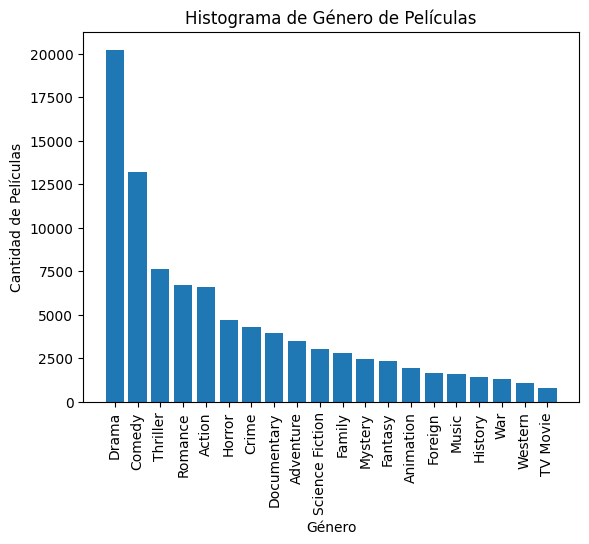

In [17]:
# Convertir la columna 'genres' a lista de géneros
genres = df['genres'].apply(ast.literal_eval).tolist()

# Extraer los géneros de la lista de cada fila
generos = [genero for lista_generos in genres for genero in lista_generos]

# Contar la frecuencia de cada género
conteo_generos = pd.Series(generos).value_counts()

# Crear el histograma
plt.bar(conteo_generos.index, conteo_generos.values)
plt.xlabel('Género')
plt.ylabel('Cantidad de Películas')
plt.title('Histograma de Género de Películas')
plt.xticks(rotation=90)
plt.show()

In [18]:
generos_unicos = conteo_generos.index.tolist()
len(generos_unicos)

20

In [19]:
'''Considerando que hay 20 generos (no muchos), obviamente la columna 'genres' nos sera de gran utilidad 
para el modelo, sin importar que este desbalanceado el dataset ya que no esta muy desbalanceado como adult 
(8 de 45000 registros es demasiado)
'''
columnas_deseadas.append('genres')

In [20]:
columnas(df)

adult
belongs_to_collection
budget
genres
id
original_language
overview
popularity
production_companies
production_countries
release_date
release_year
revenue
runtime
spoken_languages
status
tagline
title
vote_average
vote_count
cast
crew
return


In [21]:
df['id']

0           862.0
1          8844.0
2         15602.0
3         31357.0
4         11862.0
           ...   
45340     30840.0
45341    111109.0
45342     67758.0
45343    227506.0
45344    461257.0
Name: id, Length: 45345, dtype: float64

In [22]:
df['id'] = df['id'].astype(int)

In [23]:
df['id']

0           862
1          8844
2         15602
3         31357
4         11862
          ...  
45340     30840
45341    111109
45342     67758
45343    227506
45344    461257
Name: id, Length: 45345, dtype: int32

In [24]:
# Al momento de hayar el valor de similitud, sera necesario filtrar mediante 'id' para que no se recomiende asi misma
columnas_deseadas.append('id')

In [25]:
columnas(df)

adult
belongs_to_collection
budget
genres
id
original_language
overview
popularity
production_companies
production_countries
release_date
release_year
revenue
runtime
spoken_languages
status
tagline
title
vote_average
vote_count
cast
crew
return


In [26]:
df['original_language']

0        en
1        en
2        en
3        en
4        en
         ..
45340    en
45341    tl
45342    en
45343    en
45344    en
Name: original_language, Length: 45345, dtype: object

In [27]:
df['original_language'].isna().sum()

11

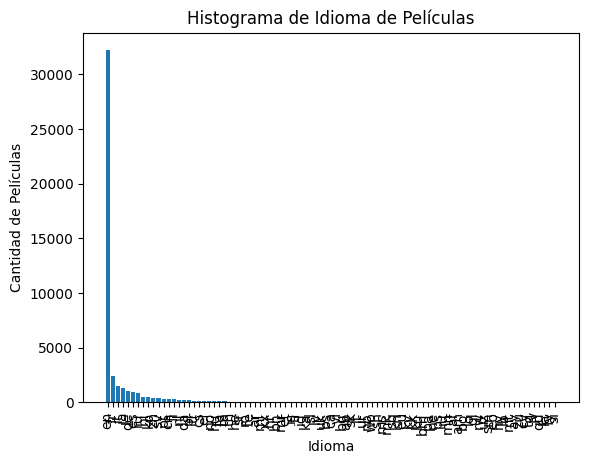

In [28]:
# Contar la frecuencia de cada idioma
conteo_idiomas = df['original_language'].value_counts()

# Crear el histograma
plt.bar(conteo_idiomas.index, conteo_idiomas.values)
plt.xlabel('Idioma')
plt.ylabel('Cantidad de Películas')
plt.title('Histograma de Idioma de Películas')
plt.xticks(rotation=90)
plt.show()

In [29]:
cantidad_idiomas_unicos = len(conteo_idiomas.index)
print(cantidad_idiomas_unicos)

89


In [30]:
'''
No voy a considerar a 'original_language' ya que esta muy desbalanceado
''' 

"\nNo voy a considerar a 'original_language' ya que esta muy desbalanceado\n"

In [31]:
columnas(df)

adult
belongs_to_collection
budget
genres
id
original_language
overview
popularity
production_companies
production_countries
release_date
release_year
revenue
runtime
spoken_languages
status
tagline
title
vote_average
vote_count
cast
crew
return


In [32]:
df['overview']

0        Led by Woody, Andy's toys live happily in his ...
1        When siblings Judy and Peter discover an encha...
2        A family wedding reignites the ancient feud be...
3        Cheated on, mistreated and stepped on, the wom...
4        Just when George Banks has recovered from his ...
                               ...                        
45340    Yet another version of the classic epic, with ...
45341    An artist struggles to finish his work while a...
45342    When one of her hits goes wrong, a professiona...
45343    In a small town live two brothers, one a minis...
45344    50 years after decriminalisation of homosexual...
Name: overview, Length: 45345, dtype: object

In [33]:
'''
Tengo que admitir que no me da mucha confianza las librerias de NLP.
Estaria bueno obtener una medida de similitud de esta columna, sin 
embargo, es un tema mio la desconfianza con estas librerias (sobre todo
porque no tengo ni la mas minima idea de la implementacion de estas librerias)
'''

'\nTengo que admitir que no me da mucha confianza las librerias de NLP.\nEstaria bueno obtener una medida de similitud de esta columna, sin \nembargo, es un tema mio la desconfianza con estas librerias (sobre todo\nporque no tengo ni la mas minima idea de la implementacion de estas librerias)\n'

In [34]:
columnas(df)

adult
belongs_to_collection
budget
genres
id
original_language
overview
popularity
production_companies
production_countries
release_date
release_year
revenue
runtime
spoken_languages
status
tagline
title
vote_average
vote_count
cast
crew
return


In [35]:
df['popularity']

0        21.946943
1        17.015539
2        11.712900
3         3.859495
4         8.387519
           ...    
45340     5.683753
45341     0.178241
45342     0.903007
45343     0.003503
45344     0.163015
Name: popularity, Length: 45345, dtype: float64

In [36]:
'''
Averigue sobre el puntaje de popularidad asignado por TDBM y parece
ser un puntaje relativo pero confiable. 
Concluyo por considerar esta columna asi como esta, y no discretizarla
como pensaba hacerlo.
'''

'\nAverigue sobre el puntaje de popularidad asignado por TDBM y parece\nser un puntaje relativo pero confiable. \nConcluyo por considerar esta columna asi como esta, y no discretizarla\ncomo pensaba hacerlo.\n'

In [37]:
columnas(df)

adult
belongs_to_collection
budget
genres
id
original_language
overview
popularity
production_companies
production_countries
release_date
release_year
revenue
runtime
spoken_languages
status
tagline
title
vote_average
vote_count
cast
crew
return


In [38]:
df['production_companies']

0                              ["Pixar Animation Studios"]
1        ["TriStar Pictures", "Teitler Film", "Intersco...
2                       ["Warner Bros.", "Lancaster Gate"]
3               ["Twentieth Century Fox Film Corporation"]
4         ["Sandollar Productions", "Touchstone Pictures"]
                               ...                        
45340    ["Westdeutscher Rundfunk (WDR)", "Working Titl...
45341                                      ["Sine Olivia"]
45342                          ["American World Pictures"]
45343                                        ["Yermoliev"]
45344                                                   []
Name: production_companies, Length: 45345, dtype: object

In [39]:
len(df[df['production_companies'] == '[]'])

11846

In [40]:
# Convertir la columna 'production_companies' a lista de productoras
productoras = df['production_companies'].apply(ast.literal_eval)

# Crear un diccionario para contar la cantidad de películas asociadas a cada productora
conteo_productoras = {}

# Iterar sobre cada lista de productoras y actualizar el contador en el diccionario
for lista_productora in productoras:
    for productora in lista_productora:
        if productora in conteo_productoras:
            conteo_productoras[productora] += 1
        else:
            conteo_productoras[productora] = 1

In [41]:
len(conteo_productoras.keys())

23318

In [42]:
'''
Hay 23318 productoras distintas, suponiendo que cada productora esta asociado
a dos films, no seria util considerar esta columna en el ml.
'''

'\nHay 23318 productoras distintas, suponiendo que cada productora esta asociado\na dos films, no seria util considerar esta columna en el ml.\n'

In [43]:
columnas(df)

adult
belongs_to_collection
budget
genres
id
original_language
overview
popularity
production_companies
production_countries
release_date
release_year
revenue
runtime
spoken_languages
status
tagline
title
vote_average
vote_count
cast
crew
return


In [44]:
df['production_countries']

0                             ["United States of America"]
1                             ["United States of America"]
2                             ["United States of America"]
3                             ["United States of America"]
4                             ["United States of America"]
                               ...                        
45340    ["Canada", "Germany", "United Kingdom", "Unite...
45341                                      ["Philippines"]
45342                         ["United States of America"]
45343                                           ["Russia"]
45344                                   ["United Kingdom"]
Name: production_countries, Length: 45345, dtype: object

In [45]:
len(df[df['production_countries'] == '[]'])

6208

In [46]:
# Obtener la lista de todas los paises_productores
paises_productores = [pais_productora for paises_productores in df['production_countries'] for pais_productora in paises_productores]

# Obtener la cantidad de paises_productores únicas
cantidad_paises_productores_unicas = len(set(paises_productores))

print("Cantidad de paises_productores únicas:", cantidad_paises_productores_unicas)

Cantidad de paises_productores únicas: 55


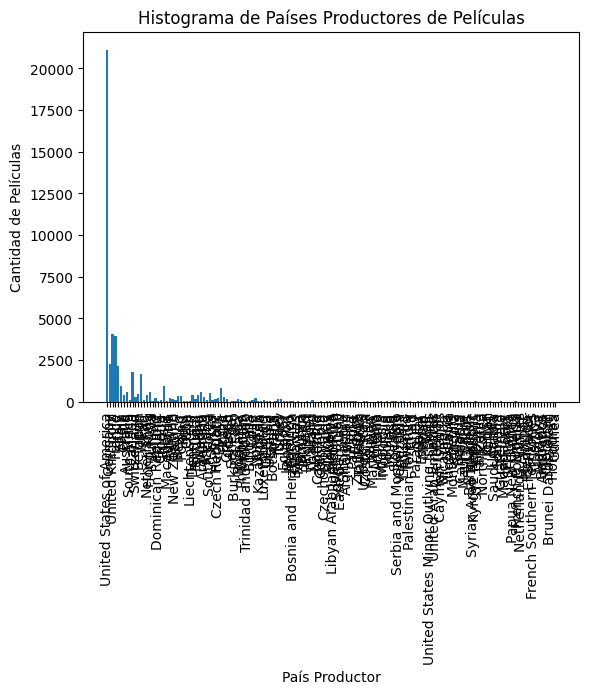

In [47]:
# Convertir la columna 'production_countries' a lista de países productores
production_countries = df['production_countries'].apply(ast.literal_eval)

# Crear un diccionario para contar la cantidad de películas asociadas a cada país
conteo_paises = {}

# Iterar sobre cada lista de países productores y actualizar el contador en el diccionario
for lista_paises in production_countries:
    for pais in lista_paises:
        if pais in conteo_paises:
            conteo_paises[pais] += 1
        else:
            conteo_paises[pais] = 1

# Crear el histograma
plt.bar(conteo_paises.keys(), conteo_paises.values())
plt.xlabel('País Productor')
plt.ylabel('Cantidad de Películas')
plt.title('Histograma de Países Productores de Películas')
plt.xticks(rotation=90)
plt.show()

In [48]:
paises_ordenados = sorted(conteo_paises.items(), key=lambda x: x[1])

for pais, valor in paises_ordenados:
    print(pais, valor)

Kuwait 1
Martinique 1
United States Minor Outlying Islands 1
Cayman Islands 1
Somalia 1
Madagascar 1
French Polynesia 1
Netherlands Antilles 1
Myanmar 1
Bermuda 1
French Southern Territories 1
Samoa 1
Moldova 1
Barbados 1
Antarctica 1
Gibraltar 1
Brunei Darussalam 1
Honduras 1
Guinea 1
Trinidad and Tobago 2
Macao 2
Mali 2
Azerbaijan 2
Bangladesh 2
Tanzania 2
Uganda 2
Saudi Arabia 2
Papua New Guinea 2
Botswana 3
Namibia 3
Libyan Arab Jamahiriya 3
Zimbabwe 3
Tajikistan 3
Mongolia 3
Serbia and Montenegro 3
Paraguay 3
Nicaragua 3
Liberia 3
Angola 3
North Korea 3
Kenya 3
Sri Lanka 3
El Salvador 3
Bhutan 4
Jamaica 4
Czechoslovakia 4
Ghana 4
Monaco 4
Rwanda 4
Chad 4
Yugoslavia 4
Congo 5
Bahamas 5
Nepal 5
Cameroon 5
Mauritania 5
Syrian Arab Republic 5
Albania 5
Ethiopia 5
Aruba 6
East Germany 6
Uzbekistan 6
Costa Rica 6
Kyrgyz Republic 6
Guatemala 6
Nigeria 6
Panama 7
Montenegro 7
Cyprus 7
Dominican Republic 8
Liechtenstein 8
Afghanistan 8
Armenia 8
Iraq 8
Malta 9
Belarus 9
Cambodia 9
Jordan 9

In [49]:
columnas_deseadas.append('production_countries')
'''
Considerando que no son muchos paises, inicialmente voy a considerar
a la columna 'production_countries', para el ml solo considerare los 
paises que tengan mas de un film asociado
'''

"\nConsiderando que no son muchos paises, inicialmente voy a considerar\na la columna 'production_countries', para el ml solo considerare los \npaises que tengan mas de un film asociado\n"

In [50]:
columnas(df)

adult
belongs_to_collection
budget
genres
id
original_language
overview
popularity
production_companies
production_countries
release_date
release_year
revenue
runtime
spoken_languages
status
tagline
title
vote_average
vote_count
cast
crew
return


In [51]:
df['release_date']

0        1995-10-30
1        1995-12-15
2        1995-12-22
3        1995-12-22
4        1995-02-10
            ...    
45340    1991-05-13
45341    2011-11-17
45342    2003-08-01
45343    1917-10-21
45344    2017-06-09
Name: release_date, Length: 45345, dtype: object

In [52]:
df['release_date'].isna().sum()

0

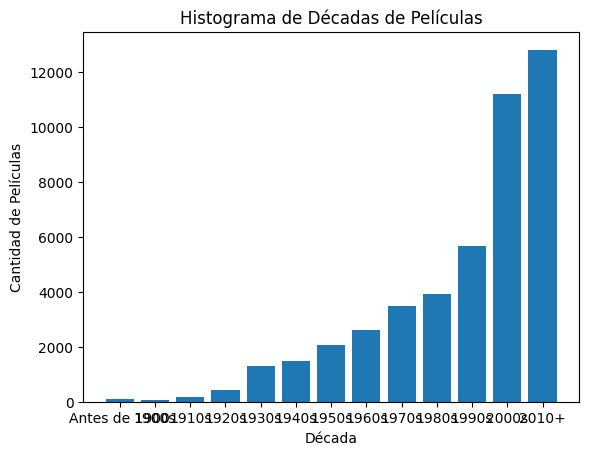

In [53]:
# Convertimos 'release_date' a formato fecha
df['release_date'] = pd.to_datetime(df['release_date'])

# Funcion para obtener la decada correspondiente
def get_decade(year):
    if year >= 2010:
        return '2010+'
    elif year <= 1900:
        return 'Antes de 1900'
    else:
        return str(year // 10 * 10) + "s"

# Utilizamos la funcion creada para asignar la decada correspondiente
decade = df['release_date'].dt.year.apply(get_decade)

# Implementamos nuestro histograma
conteo_decadas = decade.value_counts()
conteo_decadas = conteo_decadas.sort_index()  # Ordenar las categorías en orden ascendente
conteo_decadas = conteo_decadas.drop('Antes de 1900', errors='ignore')  # Eliminar la categoría 'Antes de 1900' si existe
conteo_decadas = pd.concat([pd.Series([95], index=['Antes de 1900']), conteo_decadas])  # Agregar la categoría 'Antes de 1900' al principio con su valor correspondiente
plt.bar(conteo_decadas.index, conteo_decadas.values)
plt.xlabel('Década')
plt.ylabel('Cantidad de Películas')
plt.title('Histograma de Décadas de Películas')
plt.show()

In [54]:
conteo_decadas

Antes de 1900       95
1900s               73
1910s              176
1920s              431
1930s             1315
1940s             1493
1950s             2079
1960s             2621
1970s             3471
1980s             3928
1990s             5675
2000s            11195
2010+            12793
dtype: int64

In [55]:
'''
Me parece que es viable considerar esta columna, aclarando que en el 
ml se discretizara para manejar un grupo pequeño de clases
'''

'\nMe parece que es viable considerar esta columna, aclarando que en el \nml se discretizara para manejar un grupo pequeño de clases\n'

In [56]:
columnas(df)

adult
belongs_to_collection
budget
genres
id
original_language
overview
popularity
production_companies
production_countries
release_date
release_year
revenue
runtime
spoken_languages
status
tagline
title
vote_average
vote_count
cast
crew
return


In [57]:
df['release_year']

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
45340    1991
45341    2011
45342    2003
45343    1917
45344    2017
Name: release_year, Length: 45345, dtype: int64

In [58]:
'''
En oposicion al comentario anterior, voy a utlizar 'release_year' y no 
'release_date'. Sin embargo no puedo quitar a 'release_date' de la lista
de columnas_deseadas ya que es necesario para las funciones de la API
'''

"\nEn oposicion al comentario anterior, voy a utlizar 'release_year' y no \n'release_date'. Sin embargo no puedo quitar a 'release_date' de la lista\nde columnas_deseadas ya que es necesario para las funciones de la API\n"

In [59]:
columnas(df)

adult
belongs_to_collection
budget
genres
id
original_language
overview
popularity
production_companies
production_countries
release_date
release_year
revenue
runtime
spoken_languages
status
tagline
title
vote_average
vote_count
cast
crew
return


In [60]:
df['revenue']

0        373554033.0
1        262797249.0
2                0.0
3         81452156.0
4         76578911.0
            ...     
45340            0.0
45341            0.0
45342            0.0
45343            0.0
45344            0.0
Name: revenue, Length: 45345, dtype: float64

In [61]:
len(df[df['revenue'] == 0])

37948

In [62]:
'''
Hay muchas filas que son cero, sin embargo, no puedo quitar esta columna de 
columnas_deseadas debido a que es util para las funciones de la API
'''

'\nHay muchas filas que son cero, sin embargo, no puedo quitar esta columna de \ncolumnas_deseadas debido a que es util para las funciones de la API\n'

In [63]:
columnas(df)

adult
belongs_to_collection
budget
genres
id
original_language
overview
popularity
production_companies
production_countries
release_date
release_year
revenue
runtime
spoken_languages
status
tagline
title
vote_average
vote_count
cast
crew
return


In [64]:
df['runtime']

0         81.0
1        104.0
2        101.0
3        127.0
4        106.0
         ...  
45340    104.0
45341    360.0
45342     90.0
45343     87.0
45344     75.0
Name: runtime, Length: 45345, dtype: float64

In [65]:
len(df[df['runtime'].isna()])
# Me parece una buena caracteristica la duracion 

246

In [66]:
print(df['runtime'].dtype)  # Verificar el tipo de datos de la columna
print(df['runtime'].isna().sum())  # Contar los valores nulos en la columna
print(df['runtime'].unique())  # Mostrar los valores únicos de la columna

float64
246
[8.100e+01 1.040e+02 1.010e+02 1.270e+02 1.060e+02 1.700e+02 9.700e+01
 1.300e+02 8.800e+01 7.800e+01 1.920e+02 1.190e+02 1.780e+02 1.360e+02
 9.800e+01 9.000e+01 1.030e+02 1.050e+02 1.240e+02 1.320e+02 1.110e+02
 1.120e+02 1.230e+02 1.000e+02 1.080e+02 9.900e+01 1.290e+02 5.000e+01
 8.900e+01 1.210e+02 1.220e+02 5.100e+01 1.170e+02 1.160e+02 9.600e+01
 9.300e+01 9.500e+01 1.150e+02 1.370e+02 9.200e+01 8.500e+01 9.100e+01
 1.750e+02 8.700e+01 7.000e+01 1.180e+02 1.020e+02 1.350e+02 1.100e+02
 1.770e+02 1.140e+02 1.130e+02 8.600e+01 1.250e+02 1.400e+02 1.390e+02
 8.200e+01 8.300e+01 1.280e+02 1.090e+02 8.000e+01 1.340e+02 1.070e+02
 9.400e+01 1.450e+02 7.300e+01 0.000e+00 7.700e+01 1.710e+02 1.330e+02
 1.540e+02 1.620e+02 1.420e+02 1.260e+02 1.410e+02 1.800e+02 1.910e+02
 6.100e+01 8.400e+01 1.440e+02 1.310e+02 1.380e+02 1.950e+02 1.870e+02
 7.600e+01 1.200e+02 1.600e+02 1.810e+02 6.000e+01       nan 7.900e+01
 2.500e+01 7.500e+01 7.400e+01 3.000e+01 1.490e+02 7.100e+01 2.38

In [67]:
df['runtime'] = df['runtime'].fillna(0).astype(int)

In [68]:
print(df['runtime'].dtype)  # Verificar el tipo de datos de la columna
print(df['runtime'].isna().sum())  # Contar los valores nulos en la columna
print(df['runtime'].unique())  # Mostrar los valores únicos de la columna

int32
0
[  81  104  101  127  106  170   97  130   88   78  192  119  178  136
   98   90  103  105  124  132  111  112  123  100  108   99  129   50
   89  121  122   51  117  116   96   93   95  115  137   92   85   91
  175   87   70  118  102  135  110  177  114  113   86  125  140  139
   82   83  128  109   80  134  107   94  145   73    0   77  171  133
  154  162  142  126  141  180  191   61   84  144  131  138  195  187
   76  120  160  181   60   79   25   75   74   30  149   71  238  201
  167   65  143   64  174  147  151   69    6   62  161  216  153  168
  200   23  229  193  163   68  172  183  212  287  159  150  242   72
  155  194   44  176  152  207  164  169  197  188    8   52   63   18
  182   67  184  198  156   27  157  148  158  189  146   56  202   33
  165    5  298   42  254  199  217  248  173   53   40   45   46   38
  270   37  219  185   54   58  208   55  179  203  214  239  224  186
   57  566   59   49   66  220  283  273  320  366  225  292  166   2

In [69]:
df['runtime']

0         81
1        104
2        101
3        127
4        106
        ... 
45340    104
45341    360
45342     90
45343     87
45344     75
Name: runtime, Length: 45345, dtype: int32

In [70]:
max_runtime = df['runtime'].max()
min_runtime = df['runtime'].min()

print("Duración máxima:", max_runtime)
print("Duración mínima:", min_runtime)

Duración máxima: 1256
Duración mínima: 0


In [71]:
numero = 1256
divisores = []

for i in range(1, numero + 1):
    if numero % i == 0:
        divisores.append(i)

print(divisores)

[1, 2, 4, 8, 157, 314, 628, 1256]


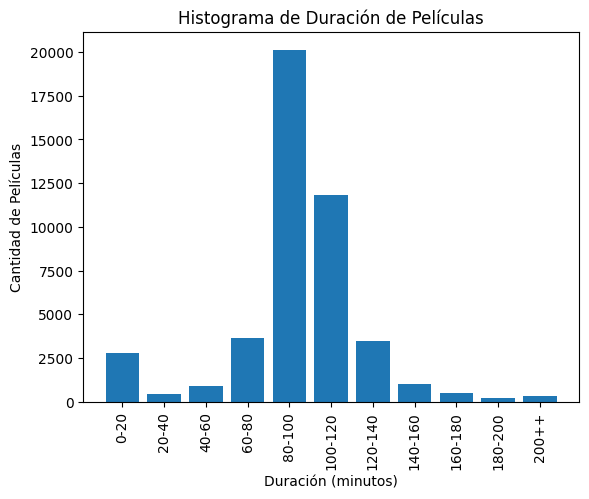

In [72]:
# Obtener el máximo y mínimo valor de la columna 'runtime'
max_runtime = df['runtime'].max()
min_runtime = df['runtime'].min()

# Definir los límites de los intervalos
intervalos = list(range(min_runtime, 200, 20)) + [200, max_runtime]

# Etiquetar los intervalos
etiquetas = [f'{lim_inf}-{lim_sup}' if lim_sup != max_runtime else f'{lim_inf}+' for lim_inf, lim_sup in zip(intervalos[:-1], intervalos[1:])]

# Agregar la condición de que si la duración es mayor a 200, se agrega en un último segmento
etiquetas[-1] = f'{etiquetas[-1]}+'

# Crear una nueva columna 'runtime_interval' con los intervalos de duración
runtime_interval = pd.cut(df['runtime'], bins=intervalos, labels=etiquetas, include_lowest=True, right=False)

# Calcular la frecuencia de cada intervalo
conteo_intervalos = runtime_interval.value_counts().sort_index()

# Crear el histograma
plt.bar(conteo_intervalos.index, conteo_intervalos.values)
plt.xlabel('Duración (minutos)')
plt.ylabel('Cantidad de Películas')
plt.title('Histograma de Duración de Películas')
plt.xticks(rotation=90)
plt.show()

In [73]:
conteo_intervalos

runtime
0-20        2774
20-40        477
40-60        893
60-80       3672
80-100     20123
100-120    11816
120-140     3497
140-160     1016
160-180      482
180-200      244
200++        350
Name: count, dtype: int64

In [74]:
columnas_deseadas.append('runtime')
'''
Esta columna la voy a considerar, me parece muy buena
'''

'\nEsta columna la voy a considerar, me parece muy buena\n'

In [75]:
columnas(df)

adult
belongs_to_collection
budget
genres
id
original_language
overview
popularity
production_companies
production_countries
release_date
release_year
revenue
runtime
spoken_languages
status
tagline
title
vote_average
vote_count
cast
crew
return


In [76]:
df['spoken_languages']

0                         ["English"]
1        ["English", "Fran\u00e7ais"]
2                         ["English"]
3                         ["English"]
4                         ["English"]
                     ...             
45340                     ["English"]
45341                            [""]
45342                     ["English"]
45343                              []
45344                     ["English"]
Name: spoken_languages, Length: 45345, dtype: object

In [77]:
len(df[df['spoken_languages'].isin(['[]', '[""]'])])

3888

In [78]:
'''
No voy a considerar a la columna 'spoken_languages'ya que no hay mayor relevancia 
que idiomas se hablanen la pelicula, si fuera mas bien los idiomas a los que se ha hecho
el doblaje entonces ahi si seria util
'''

"\nNo voy a considerar a la columna 'spoken_languages'ya que no hay mayor relevancia \nque idiomas se hablanen la pelicula, si fuera mas bien los idiomas a los que se ha hecho\nel doblaje entonces ahi si seria util\n"

In [79]:
columnas(df)

adult
belongs_to_collection
budget
genres
id
original_language
overview
popularity
production_companies
production_countries
release_date
release_year
revenue
runtime
spoken_languages
status
tagline
title
vote_average
vote_count
cast
crew
return


In [80]:
df['vote_average']

0        7.7
1        6.9
2        6.5
3        6.1
4        5.7
        ... 
45340    5.7
45341    9.0
45342    3.8
45343    0.0
45344    0.0
Name: vote_average, Length: 45345, dtype: float64

In [81]:
df[df['vote_average'].isna()]

,adult,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,return


In [82]:
voto_maximo = df['vote_average'].max()
voto_minimo = df['vote_average'].min()

print("Voto máximo:", voto_maximo)
print("Voto mínimo:", voto_minimo)

Voto máximo: 10.0
Voto mínimo: 0.0


In [83]:
vote_average = df['vote_average'].astype(int)

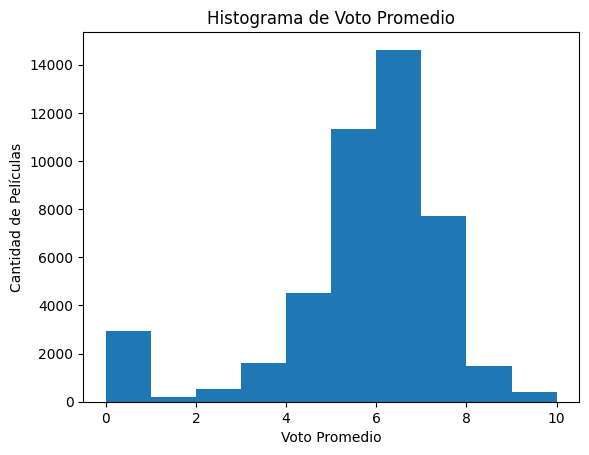

In [84]:
plt.hist(vote_average, bins=10)
plt.xlabel('Voto Promedio')
plt.ylabel('Cantidad de Películas')
plt.title('Histograma de Voto Promedio')
plt.show()

In [85]:
'''
Esta columna es buena tambien, la voy a considerar 
'''

'\nEsta columna es buena tambien, la voy a considerar \n'

In [86]:
columnas(df)

adult
belongs_to_collection
budget
genres
id
original_language
overview
popularity
production_companies
production_countries
release_date
release_year
revenue
runtime
spoken_languages
status
tagline
title
vote_average
vote_count
cast
crew
return


In [87]:
columnas_deseadas.append('crew')
columnas_deseadas.append('cast')

In [88]:
columnas(df)

adult
belongs_to_collection
budget
genres
id
original_language
overview
popularity
production_companies
production_countries
release_date
release_year
revenue
runtime
spoken_languages
status
tagline
title
vote_average
vote_count
cast
crew
return


In [89]:
'''
Vote_count: No la voy a considerar, si bien podria usarlo en conjunto
con vote_average para determinar pesos y demas, no me queda tiempo
'''

'\nVote_count: No la voy a considerar, si bien podria usarlo en conjunto\ncon vote_average para determinar pesos y demas, no me queda tiempo\n'

# Sistema de Recomendacion

- Creamos nuestro csv de donde nuestra API se alimentara

In [90]:
columnas_deseadas

['release_date',
 'title',
 'release_year',
 'popularity',
 'vote_count',
 'vote_average',
 'return',
 'budget',
 'revenue',
 'genres',
 'id',
 'production_countries',
 'runtime',
 'crew',
 'cast']

In [91]:
data_consultas = df[columnas_deseadas].copy()

- Exportamos la data que sera consumida por nuestra API

In [92]:
data_consultas.to_csv("../../data/data_procesada/data_consultas.csv", encoding='utf-8-sig', index=False, sep=',') 

- Cambio de la estructura de las variables

In [93]:
columnas_ml = columnas_deseadas.copy()

In [94]:
data_ml = df[columnas_deseadas].copy()

In [95]:
columnas(data_ml)

release_date
title
release_year
popularity
vote_count
vote_average
return
budget
revenue
genres
id
production_countries
runtime
crew
cast


In [96]:
columnas_a_eliminar = ['release_date', 'vote_count', 'return', 'budget', 'revenue']
data_ml = data_ml.drop(columnas_a_eliminar, axis=1)

In [97]:
columnas_ordenadas = data_ml.columns.tolist()  # Obtener la lista de columnas
columnas_ordenadas.remove('id')  # Remover la columna 'id' de la lista
columnas_ordenadas.insert(0, 'id')  # Insertar la columna 'id' al inicio de la lista
data_ml = data_ml[columnas_ordenadas]  # Reordenar las columnas en el DataFrame

In [98]:
columnas(data_ml)

id
title
release_year
popularity
vote_average
genres
production_countries
runtime
crew
cast


In [99]:
data_ml.head()

,id,title,release_year,popularity,vote_average,genres,production_countries,runtime,crew,cast
0,862,Toy Story,1995,21.946943,7.7,"[""Animation"", ""Comedy"", ""Family""]","[""United States of America""]",81,"[""John Lasseter""]","[""Tom Hanks"", ""Tim Allen"", ""Don Rickles"", ""Jim..."
1,8844,Jumanji,1995,17.015539,6.9,"[""Adventure"", ""Fantasy"", ""Family""]","[""United States of America""]",104,"[""Joe Johnston""]","[""Robin Williams"", ""Jonathan Hyde"", ""Kirsten D..."
2,15602,Grumpier Old Men,1995,11.712900,6.5,"[""Romance"", ""Comedy""]","[""United States of America""]",101,"[""Howard Deutch""]","[""Walter Matthau"", ""Jack Lemmon"", ""Ann-Margret..."
3,31357,Waiting to Exhale,1995,3.859495,6.1,"[""Comedy"", ""Drama"", ""Romance""]","[""United States of America""]",127,"[""Forest Whitaker""]","[""Whitney Houston"", ""Angela Bassett"", ""Loretta..."
4,11862,Father of the Bride Part II,1995,8.387519,5.7,"[""Comedy""]","[""United States of America""]",106,"[""Charles Shyer""]","[""Steve Martin"", ""Diane Keaton"", ""Martin Short..."


- Discretizar 'release_year'

In [100]:
data_ml['release_year']

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
45340    1991
45341    2011
45342    2003
45343    1917
45344    2017
Name: release_year, Length: 45345, dtype: int64

In [101]:
# Funcion para obtener el numero de la decada correspondiente
def get_decade_number(year):
    if year < 1900:
        return 0
    elif year >= 2010:
        return 12
    else:
        return (year - 1890) // 10

# Utilizamos la funcion creada para asignar el numero de la decada correspondiente
data_ml['release_year'] = data_ml['release_year'].apply(get_decade_number)

In [102]:
data_ml['release_year']

0        10
1        10
2        10
3        10
4        10
         ..
45340    10
45341    12
45342    11
45343     2
45344    12
Name: release_year, Length: 45345, dtype: int64

In [103]:
'''
La idea es que para esta columna calcularemos la similitud entre ambas peliculas
haciendo uso de la probabilidad ¿como? lo que hare es que restamos los valores de 
ambos vectores y lo dividire entre la distancia de esquina a esquina (entre 12) y 
a 1 (la probabilidad total) le restamos este resultado
resultado 
Entonces diremos que si las decadas de lanzamiento estan relativamente cerca, entonces
estos dos films se parece mucho en esta caracteristica
'''

'\nLa idea es que para esta columna calcularemos la similitud entre ambas peliculas\nhaciendo uso de la probabilidad ¿como? lo que hare es que restamos los valores de \nambos vectores y lo dividire entre la distancia de esquina a esquina (entre 12) y \na 1 (la probabilidad total) le restamos este resultado\nresultado \nEntonces diremos que si las decadas de lanzamiento estan relativamente cerca, entonces\nestos dos films se parece mucho en esta caracteristica\n'

In [104]:
columnas(data_ml)

id
title
release_year
popularity
vote_average
genres
production_countries
runtime
crew
cast


- Tratar la columna 'popularity'

In [105]:
data_ml['popularity']

0        21.946943
1        17.015539
2        11.712900
3         3.859495
4         8.387519
           ...    
45340     5.683753
45341     0.178241
45342     0.903007
45343     0.003503
45344     0.163015
Name: popularity, Length: 45345, dtype: float64

In [106]:
max_popularity = df['popularity'].max()
min_popularity = df['popularity'].min()

print("Máximo: ", max_popularity)
print("Mínimo: ", min_popularity)

Máximo:  547.488298
Mínimo:  0.0


In [107]:
'''
La idea es la misma, pero no voy a discretizarlo ni volverlo entero.
Calcular la distancia entre ambos vectores para esta caracteristica
Dividirlo entre la distancia de extremo a extremo (547.488298)
y luego 1 - este resultado.
'''

'\nLa idea es la misma, pero no voy a discretizarlo ni volverlo entero.\nCalcular la distancia entre ambos vectores para esta caracteristica\nDividirlo entre la distancia de extremo a extremo (547.488298)\ny luego 1 - este resultado.\n'

In [108]:
columnas(data_ml)

id
title
release_year
popularity
vote_average
genres
production_countries
runtime
crew
cast


- Tratar la columna 'vote_average'

In [109]:
df['vote_average']

0        7.7
1        6.9
2        6.5
3        6.1
4        5.7
        ... 
45340    5.7
45341    9.0
45342    3.8
45343    0.0
45344    0.0
Name: vote_average, Length: 45345, dtype: float64

In [110]:
'''
Aqui tambien haremos lo mismo que en 'popularity'
'''

"\nAqui tambien haremos lo mismo que en 'popularity'\n"

In [111]:
columnas(data_ml)

id
title
release_year
popularity
vote_average
genres
production_countries
runtime
crew
cast


In [112]:
data_ml.head()

,id,title,release_year,popularity,vote_average,genres,production_countries,runtime,crew,cast
0,862,Toy Story,10,21.946943,7.7,"[""Animation"", ""Comedy"", ""Family""]","[""United States of America""]",81,"[""John Lasseter""]","[""Tom Hanks"", ""Tim Allen"", ""Don Rickles"", ""Jim..."
1,8844,Jumanji,10,17.015539,6.9,"[""Adventure"", ""Fantasy"", ""Family""]","[""United States of America""]",104,"[""Joe Johnston""]","[""Robin Williams"", ""Jonathan Hyde"", ""Kirsten D..."
2,15602,Grumpier Old Men,10,11.712900,6.5,"[""Romance"", ""Comedy""]","[""United States of America""]",101,"[""Howard Deutch""]","[""Walter Matthau"", ""Jack Lemmon"", ""Ann-Margret..."
3,31357,Waiting to Exhale,10,3.859495,6.1,"[""Comedy"", ""Drama"", ""Romance""]","[""United States of America""]",127,"[""Forest Whitaker""]","[""Whitney Houston"", ""Angela Bassett"", ""Loretta..."
4,11862,Father of the Bride Part II,10,8.387519,5.7,"[""Comedy""]","[""United States of America""]",106,"[""Charles Shyer""]","[""Steve Martin"", ""Diane Keaton"", ""Martin Short..."


- Hot encoder a genres

In [113]:
unique_genres = set()
for genres_list in data_ml['genres']:
    unique_genres.update(ast.literal_eval(genres_list))
unique_genres = list(unique_genres)

In [114]:
unique_genres

['Family',
 'Mystery',
 'Music',
 'Documentary',
 'Western',
 'Animation',
 'TV Movie',
 'Foreign',
 'Science Fiction',
 'Romance',
 'History',
 'Drama',
 'Action',
 'Horror',
 'Thriller',
 'War',
 'Adventure',
 'Crime',
 'Comedy',
 'Fantasy']

In [115]:
data_ml['binary_genres'] = ''

In [116]:
for index, row in data_ml.iterrows():
    genres_list = ast.literal_eval(row['genres'])
    binary_representation = [1 if genre in genres_list else 0 for genre in unique_genres]
    data_ml.at[index, 'binary_genres'] = str(binary_representation)

In [117]:
data_ml['binary_genres'] 

0        [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
3        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ...
4        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                               ...                        
45340    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, ...
45341    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
45342    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, ...
45343    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
45344    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: binary_genres, Length: 45345, dtype: object

In [118]:
columnas(data_ml)

id
title
release_year
popularity
vote_average
genres
production_countries
runtime
crew
cast
binary_genres


In [119]:
data_ml = data_ml.drop('genres', axis=1)

In [120]:
data_ml = data_ml.rename(columns={'binary_genres': 'genres'})

In [121]:
columnas(data_ml)

id
title
release_year
popularity
vote_average
production_countries
runtime
crew
cast
genres


In [122]:
'''
Aqui la idea de extraer el valor de similitud es usar la medida de
similitud de Jaccard. Contamos la cantidad de elementos en comun y lo
dividimos entre el total, y para no ser drasticos vamos a asignarle
un valor de similitud de 0.1 si no hay elementos en comun
'''

'\nAqui la idea de extraer el valor de similitud es usar la medida de\nsimilitud de Jaccard. Contamos la cantidad de elementos en comun y lo\ndividimos entre el total, y para no ser drasticos vamos a asignarle\nun valor de similitud de 0.1 si no hay elementos en comun\n'

In [123]:
columnas(data_ml)

id
title
release_year
popularity
vote_average
production_countries
runtime
crew
cast
genres


- Tratar con la columna 'production_countries'

In [124]:
data_ml['production_countries']

0                             ["United States of America"]
1                             ["United States of America"]
2                             ["United States of America"]
3                             ["United States of America"]
4                             ["United States of America"]
                               ...                        
45340    ["Canada", "Germany", "United Kingdom", "Unite...
45341                                      ["Philippines"]
45342                         ["United States of America"]
45343                                           ["Russia"]
45344                                   ["United Kingdom"]
Name: production_countries, Length: 45345, dtype: object

In [125]:
unique_countries = set()
for countries_list in data_ml['production_countries']:
    unique_countries.update(ast.literal_eval(countries_list))
unique_countries = list(unique_countries)

In [126]:
unique_countries

['Austria',
 'Ghana',
 'French Polynesia',
 'Turkey',
 'Malta',
 'Myanmar',
 'Macedonia',
 'Ecuador',
 'Greece',
 'Puerto Rico',
 'Cameroon',
 'Trinidad and Tobago',
 'Chile',
 'Nepal',
 'Papua New Guinea',
 'Yugoslavia',
 'Iran',
 'Honduras',
 'United States of America',
 'Mauritania',
 'Bulgaria',
 'Lithuania',
 'Brazil',
 'Sri Lanka',
 'Bangladesh',
 'Bermuda',
 'Spain',
 'Mongolia',
 'Uruguay',
 'French Southern Territories',
 'Congo',
 'Kuwait',
 'Gibraltar',
 'Uzbekistan',
 'Liberia',
 'Kyrgyz Republic',
 'Serbia and Montenegro',
 'Australia',
 'United Arab Emirates',
 'North Korea',
 'Tajikistan',
 'Taiwan',
 'Hong Kong',
 'Egypt',
 'Canada',
 'Netherlands Antilles',
 'Philippines',
 'Netherlands',
 'South Korea',
 'Palestinian Territory',
 'Sweden',
 'Uganda',
 'Vietnam',
 'Norway',
 'Afghanistan',
 'Russia',
 'Liechtenstein',
 'Syrian Arab Republic',
 'Poland',
 'Romania',
 'Bosnia and Herzegovina',
 'France',
 'Czech Republic',
 'Zimbabwe',
 'Germany',
 'East Germany',
 'Para

In [127]:
data_ml['binary_countries'] = ''

In [128]:
unique_countries = set()
for countries_list in data_ml['production_countries']:
    unique_countries.update(ast.literal_eval(countries_list))
unique_countries = list(unique_countries)

In [129]:
unique_countries

['Austria',
 'Ghana',
 'French Polynesia',
 'Turkey',
 'Malta',
 'Myanmar',
 'Macedonia',
 'Ecuador',
 'Greece',
 'Puerto Rico',
 'Cameroon',
 'Trinidad and Tobago',
 'Chile',
 'Nepal',
 'Papua New Guinea',
 'Yugoslavia',
 'Iran',
 'Honduras',
 'United States of America',
 'Mauritania',
 'Bulgaria',
 'Lithuania',
 'Brazil',
 'Sri Lanka',
 'Bangladesh',
 'Bermuda',
 'Spain',
 'Mongolia',
 'Uruguay',
 'French Southern Territories',
 'Congo',
 'Kuwait',
 'Gibraltar',
 'Uzbekistan',
 'Liberia',
 'Kyrgyz Republic',
 'Serbia and Montenegro',
 'Australia',
 'United Arab Emirates',
 'North Korea',
 'Tajikistan',
 'Taiwan',
 'Hong Kong',
 'Egypt',
 'Canada',
 'Netherlands Antilles',
 'Philippines',
 'Netherlands',
 'South Korea',
 'Palestinian Territory',
 'Sweden',
 'Uganda',
 'Vietnam',
 'Norway',
 'Afghanistan',
 'Russia',
 'Liechtenstein',
 'Syrian Arab Republic',
 'Poland',
 'Romania',
 'Bosnia and Herzegovina',
 'France',
 'Czech Republic',
 'Zimbabwe',
 'Germany',
 'East Germany',
 'Para

In [130]:
for index, row in data_ml.iterrows():
    countries_list = ast.literal_eval(row['production_countries'])
    binary_representation = [1 if countrie in countries_list else 0 for countrie in unique_countries]
    data_ml.at[index, 'binary_countries'] = str(binary_representation)

In [131]:
columnas(data_ml)

id
title
release_year
popularity
vote_average
production_countries
runtime
crew
cast
genres
binary_countries


In [132]:
data_ml = data_ml.drop('production_countries', axis=1)

In [133]:
data_ml = data_ml.rename(columns={'binary_countries': 'production_countries'})

In [134]:
columnas(data_ml)

id
title
release_year
popularity
vote_average
runtime
crew
cast
genres
production_countries


- Tratar la columna 'runtime'

In [135]:
data_ml['runtime']

0         81
1        104
2        101
3        127
4        106
        ... 
45340    104
45341    360
45342     90
45343     87
45344     75
Name: runtime, Length: 45345, dtype: int32

In [136]:
data_ml = data_ml.dropna(subset=['runtime'])

In [137]:
data_ml['runtime'].isna().sum()

0

In [138]:
data_ml['runtime'] = pd.to_numeric(data_ml['runtime'], errors='coerce').fillna(-1).astype(int)

In [139]:
data_ml[data_ml['runtime'] == -1]

,id,title,release_year,popularity,vote_average,runtime,crew,cast,genres,production_countries


In [140]:
def categorize_runtime(row):
    if row['runtime'] <= 20:
        return 0
    elif row['runtime'] <= 40:
        return 1
    elif row['runtime'] <= 60:
        return 2
    elif row['runtime'] <= 80:
        return 3
    elif row['runtime'] <= 100:
        return 4
    elif row['runtime'] <= 120:
        return 5
    elif row['runtime'] <= 140:
        return 6
    elif row['runtime'] <= 160:
        return 7
    elif row['runtime'] <= 180:
        return 8
    elif row['runtime'] <= 200:
        return 9
    else:
        return 10

data_ml['runtime_category'] = data_ml.apply(categorize_runtime, axis=1)

In [141]:
data_ml['runtime_category']

0         4
1         5
2         5
3         6
4         5
         ..
45340     5
45341    10
45342     4
45343     4
45344     3
Name: runtime_category, Length: 45345, dtype: int64

In [142]:
'''
La idea es que hagamos lo mismo que en 'release_year'
'''

"\nLa idea es que hagamos lo mismo que en 'release_year'\n"

In [143]:
columnas(data_ml)

id
title
release_year
popularity
vote_average
runtime
crew
cast
genres
production_countries
runtime_category


In [144]:
data_ml = data_ml.drop('runtime', axis=1)

In [145]:
data_ml = data_ml.rename(columns={'runtime_category': 'runtime'})

In [146]:
data_ml.head()

,id,title,release_year,popularity,vote_average,crew,cast,genres,production_countries,runtime
0,862,Toy Story,10,21.946943,7.7,"[""John Lasseter""]","[""Tom Hanks"", ""Tim Allen"", ""Don Rickles"", ""Jim...","[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4
1,8844,Jumanji,10,17.015539,6.9,"[""Joe Johnston""]","[""Robin Williams"", ""Jonathan Hyde"", ""Kirsten D...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5
2,15602,Grumpier Old Men,10,11.712900,6.5,"[""Howard Deutch""]","[""Walter Matthau"", ""Jack Lemmon"", ""Ann-Margret...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5
3,31357,Waiting to Exhale,10,3.859495,6.1,"[""Forest Whitaker""]","[""Whitney Houston"", ""Angela Bassett"", ""Loretta...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6
4,11862,Father of the Bride Part II,10,8.387519,5.7,"[""Charles Shyer""]","[""Steve Martin"", ""Diane Keaton"", ""Martin Short...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5


In [147]:
data_ml['id'].isna().sum()

0

In [148]:
data_ml['title'].isna().sum(), len(data_ml[data_ml['title'] == ''])

(0, 0)

In [149]:
data_ml['release_year'].isna().sum()

0

In [150]:
data_ml['popularity'].isna().sum()

0

In [151]:
data_ml['vote_average'].isna().sum()

0

In [152]:
data_ml['genres'].isna().sum(), len(df[data_ml['genres'] == ''])

(0, 0)

In [153]:
data_ml['production_countries'].isna().sum(), len(df[data_ml['production_countries'] == ''])

(0, 0)

In [154]:
data_ml['runtime'].isna().sum()

0

- Las columnas 'crew' y 'cast' no las voy a considerar porque seria agregar muchas dimensiones innecesarias

In [155]:
data_ml = data_ml.drop('crew', axis=1)
data_ml = data_ml.drop('cast', axis=1)

In [156]:
columnas(data_ml)

id
title
release_year
popularity
vote_average
genres
production_countries
runtime


- Calculo de similitud

In [157]:
columnas(data_ml)

id
title
release_year
popularity
vote_average
genres
production_countries
runtime


In [158]:
def get_recomendacion(titulo: str, df=data_ml, lote_size=507):
    similitudes = {}
    year_distance = df['release_year'].max() - df['release_year'].min()
    popularity_distance = df['popularity'].max() - df['popularity'].min()
    vote_average_distance = df['vote_average'].max() - df['vote_average'].min()
    runtime_distance = df['runtime'].max() - df['runtime'].min()

    def calculo_Jaccard_1(valor1, valor2, distancia_maxima):
        return 1 - abs(valor1 - valor2) / distancia_maxima

    def calculo_Jaccard_2(vector1, vector2):
        cantidad_total = len(vector1)
        comparacion = vector1 == vector2
        cantidad_elementos_en_comun = np.sum(comparacion)
        if cantidad_elementos_en_comun == 0:
            return 0.000001
        else:
            return cantidad_elementos_en_comun / cantidad_total

    def calculo_Jaccard(film1, film2):
        similitud_release_year = calculo_Jaccard_1(film1['release_year'], film2['release_year'], year_distance)
        similitud_popularity = calculo_Jaccard_1(film1['popularity'], film2['popularity'], popularity_distance)
        similitud_vote_average = calculo_Jaccard_1(film1['vote_average'], film2['vote_average'], vote_average_distance)
        similitud_runtime = calculo_Jaccard_1(film1['runtime'], film2['runtime'], runtime_distance)
        similitud_genres = calculo_Jaccard_2(film1['genres'], film2['genres'])
        similitud_countries_production = calculo_Jaccard_2(film1['production_countries'], film2['production_countries'])
        similitud = similitud_release_year * similitud_popularity * similitud_vote_average * similitud_runtime * similitud_genres * similitud_countries_production
        return similitud

    def obtener_titulos_recomendados(diccionario_recomendacion, dataframe):
        titulos_recomendados = []
        for key in diccionario_recomendacion.keys():
            film_id = int(key)
            row = dataframe.loc[dataframe['id'] == film_id]
            titulo = row['title'].values[0]
            titulos_recomendados.append(titulo)
        return titulos_recomendados

    # Buscar el film por título
    film_encontrado = df[df['title'] == titulo]
    if film_encontrado.empty:
        return []  # Si no se encuentra el título, retornar lista vacía

    # Dividir el DataFrame en lotes
    lotes = np.array_split(df, np.ceil(len(df) / lote_size))

    for lote in lotes:
        for _, inner_row in lote.iterrows():
            if inner_row['id'] != film_encontrado.iloc[0]['id']:
                similitud = calculo_Jaccard(film_encontrado.iloc[0], inner_row)
                similitudes[inner_row['id']] = similitud

    diccionario_ordenado = dict(sorted(similitudes.items(), key=lambda x: x[1], reverse=True))
    diccionario_recomendacion = dict(list(diccionario_ordenado.items())[:5])
    recomendacion = obtener_titulos_recomendados(diccionario_recomendacion, df)
    return recomendacion

In [159]:
data_ml['title']

0                          Toy Story
1                            Jumanji
2                   Grumpier Old Men
3                  Waiting to Exhale
4        Father of the Bride Part II
                    ...             
45340                     Robin Hood
45341            Century of Birthing
45342                       Betrayal
45343               Satan Triumphant
45344                       Queerama
Name: title, Length: 45345, dtype: object

In [160]:
recomendacion1 = get_recomendacion('Toy Story')

In [161]:
recomendacion1

['Toy Story 2',
 'Monsters, Inc.',
 'The Simpsons Movie',
 'The SpongeBob SquarePants Movie',
 'Meet the Robinsons']

In [162]:
recomendacion2 = get_recomendacion('Jumanji')

In [163]:
recomendacion2

['Clash of the Titans',
 'The Indian in the Cupboard',
 'Alice in Wonderland',
 'The Chronicles of Narnia: The Voyage of the Dawn Treader',
 "Pete's Dragon"]

In [164]:
recomendacion3 = get_recomendacion('Grumpier Old Men')

In [165]:
recomendacion3

["There's Something About Mary",
 "You've Got Mail",
 "My Best Friend's Wedding",
 'Blast from the Past',
 'Only the Lonely']

- Exportamos el archivo data_ml.csv

In [166]:
data_ml.to_csv("../../data/data_procesada/data_ml.csv", encoding='utf-8-sig', index=False, sep=',') 